IMPORTING THE DEPENDENCIES

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

DATA COLLECTION AND PROCESSING

In [22]:
loandts = pd.read_csv('/content/drive/MyDrive/ML Datasets/loan_dataset.csv')
loandts.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [23]:
loandts.shape

(614, 13)

In [24]:
loandts.describe()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [25]:
loandts.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


DATA PRE-PROCESSING

In [9]:
loandts = loandts.dropna()

In [26]:
loandts.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


LABEL ENCODING

In [27]:
loandts.replace({"Loan_Status":{'N':0,'Y':1}},inplace = True)
# or loandts['Loan_Status'] = label_encoder.fit_transform(loandts['Loan_Status'])

In [28]:
loandts.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [29]:
loandts['Dependents'].value_counts()

,count
Dependents,
0,345
1,102
2,101
3+,51


In [30]:
# REPLACING 3+ TO 4
loandts.replace({"Dependents":{'3+':4}},inplace = True)

In [31]:
loandts['Dependents'].value_counts()

,count
Dependents,
0,345
1,102
2,101
4,51


DATA VISUALISATION

<Axes: xlabel='Education', ylabel='count'>

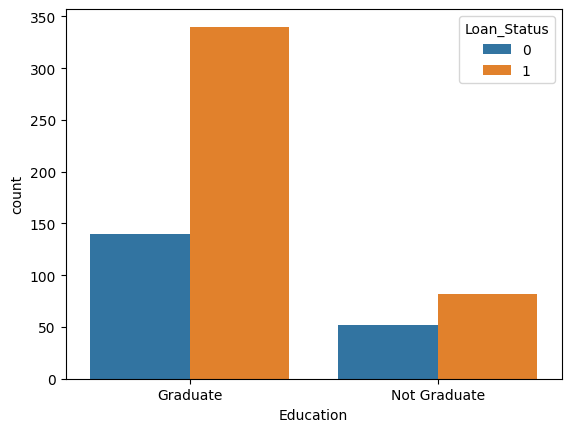

In [32]:
sns.countplot(x='Education',hue='Loan_Status',data=loandts)

CONVERTING CATEGORICAL COLUMNS TO NUMERICAL VALUES

In [39]:
loandts.replace({"Married":{'No':0,'Yes':1},"Gender":{'Male':1,'Female':0},"Self_Employed":{'No':0,'Yes':1},"Property_Area":{'Rural':0,'Semiurban':1,'Urban':2},"Education":{'Graduate':1,'Not Graduate':0}},inplace = True)

In [40]:
loandts.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0,1,0.0,5849,0.0,NaN,360.0,1.0,2,1
1,LP001003,1.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,2,1


SEPERATING DATA AND LABELS

In [41]:
X = loandts.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y = loandts['Loan_Status']

In [42]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
0       1.0      0.0          0          1            0.0             5849   
1       1.0      1.0          1          1            0.0             4583   
2       1.0      1.0          0          1            1.0             3000   
3       1.0      1.0          0          0            0.0             2583   
4       1.0      0.0          0          1            0.0             6000   
..      ...      ...        ...        ...            ...              ...   
609     0.0      0.0          0          1            0.0             2900   
610     1.0      1.0          4          1            0.0             4106   
611     1.0      1.0          1          1            0.0             8072   
612     1.0      1.0          2          1            0.0             7583   
613     0.0      0.0          0          1            1.0             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

### ** train test split**

In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.1,random_state=2,stratify = Y)

TRAINING THE MODEL

In [49]:
classifier = svm.SVC(kernel='linear')

In [50]:
classifier.fit(X_train,Y_train)

ValueError: Input X contains NaN.
SVC does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

,0
Gender,11
Married,3
Dependents,13
Education,0
Self_Employed,29
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,21
Loan_Amount_Term,13
Credit_History,47
